# COGS 108 - An Analysis of Car Accidents and Subsequent Traffic Jams in San Diego

# Overview

In this project, we aim to investigate whether the severity of traffic correlates with the weather condition and road location of a car accident in San Diego. We visualized car accident data and ran multiple hypothesis tests to determine the correlation between certain weather conditions and road locations, as well as their impact on the frequency of accidents and the severity of traffic jams that follow. We found that there are a significantly higher number of accidents that occur at junctions generally, but an accident that happens in rainy weather at a traffic signal leads to the most severe traffic jam. The findings of our project will help drivers understand when and where to be cautious when driving around in different roads and weather, which could also help pave the way to find ways to make driving safer on the road. 

# Names

- Cassandra Henrickson
- Daniel Han
- Ezra Lu
- Jasmine Qiang
- Wing Leung (Calvin)

<a id='research_question'></a>
# Research Question

How is the severity of a traffic jam after a car crash impacted as a result of where the accident occurs and different weather conditions?

<a id='background'></a>

## Background & Prior Work

- **Why is this a question of interest to your group?**

In California, the main mode of transportation is automobiles. If you want to get to any place in California, the easiest way would be to drive a car. However, because of how prevalent driving is in California, more cars on the street means there is a greater chance that you will be personally involved in an accident at least once in your life or be impacted by the traffic jam that follows. In fact, even minor car accidents can greatly impact the subsequent severity of traffic jams by physically blocking the road lanes or from distracted and curious drivers slowing down to look at the accident rather than the road, which can cause subsequent accidents and slow traffic flow [1]. As students of a university in San Diego, California, it is important that we know how safe we are on the road or when to adjust our driving to stay safe as it is a frequent and significant part of our daily lives.

Car accidents can lead to injury or even death, which is why it is very important to know how to drive in certain weather conditions. It is crucial to analyze car accident data and learn what factors can influence the likelihood of a car accident to help drivers feel safer on the roads. Weather changes, such as sudden rain, create hazardous road conditions that can lead to someone losing control of their vehicle and harming themselves and others on the road.

As San Diego does not have too much weather variation, we focused on comparing accidents that occurred during clear weather with rainy, cloudy, and foggy weather to see if habituation to driving in clear, dry weather impacts the severity of traffic jams due to car accidents when the weather changes. Because of the lack of weather variation, many Californians are not well versed in driving in the rain; either they overcompensate and slow down dramatically, increasing the likelihood of rear end collisions, or continue at a high speed and lose traction, leading to other accidents. Accompanying rainy season, fog can also increase the likelihood of a car crash by reducing visibility and enlarging the driver's blind spots [2].

We also wanted to look at car accident data that occurred at junctions/intersections, stop signs, and traffic lights because different road locations, especially junctions, can also impact the likelihood of a car accident and subsequent traffic jams [3,4]. In fact, it is important to see the impact car accidents have on the severity of traffic congestion because people driving in rush hour traffic are more likely to crash, which can be due to distracted or fatigued driving from sustained driving on congested roads [3]. 

We aim to find if there are specific road locations or weather conditions that influence the likelihood of a car accident on roads on which we personally drive. If we are able to find a relationship between how weather condition and road location factor into a car crash and the severity of the traffic jam that follows, it could help give California drivers insight as to when to be more cautious or to avoid driving. This analysis would not only be helpful for us but for others - residents and visitors of California - to feel safer driving in California as well. If everyone could learn when and where to adapt their driving in more hazardous conditions, it could potentially prevent, or at least reduce the frequency of, car crashes and subsequent harm.

- **Prior Work**

Data pulled from Traffic APIs have given a dataset comprised of real-time car accident data with variables including weather, severity of traffic impact, time of the accident, and the location of the accident [5,6]. Our research question (whether road location and weather impact the frequency of accidents and severity of subsequent traffic jams) directly relates to and can use the traffic severity, weather condition, and road location variables from that data to help carry out our analysis.

**References:**
- 1) https://ops.fhwa.dot.gov/congestion_report/chapter2.htm
- 2) https://www.hg.org/legal-articles/common-causes-of-road-accidents-in-california-during-rainy-season-24869
- 3) https://www.sutliffstout.com/faqs/where-car-accidents-happen/#:~:text=to%20a%20vehicle.-,Rural%20Roads,crashes%20occur%20on%20rural%20roads.
- 4) https://www.banksjones.com/2017/10/17/many-car-accidents-happen-intersections/#:~:text=Intersection%20accidents%20are%20common%20because,travel%20straight%20through%20the%20intersection.
- 5) https://www.kaggle.com/sobhanmoosavi/us-accidents
- 6) https://smoosavi.org/datasets/us_accidents

# Hypothesis


A car accident on a junction in rainy weather will lead to a more severe traffic jam because San Diego drivers are not accustomed to driving in the rain and intersections allow four lanes of travel, leaving a car vulnerable to other cars driving in three different directions [2,4].

# Dataset

- Dataset Name: US Accidents 
- Link to the dataset: https://www.kaggle.com/sobhanmoosavi/us-accidents?select=US_Accidents_Dec20.csv
- Number of observations: 4232541 

**Description:**

This dataset is a collection of car accident data across 49 US states from February 2016 to December 2020, taken from traffic APIs. It describes different variables present at each accident, including weather condition (clear, cloudy, rain, fog, snow, etc), severity of traffic jam caused by the accident (on 1-4 scale), time of the accident (via start and end of the traffic jam), road location (near a stop sign, traffic signal, intersection, etc), and geographical location (state, county, city, etc). 

# Setup

In [1]:
## YOUR CODE HERE
# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# make sure pandas, numpy, and statistics are imported
import pandas as pd
import numpy as np
import statistics

import warnings
warnings.filterwarnings('ignore')

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest, mannwhitneyu, chi2_contingency

import itertools
from statsmodels.sandbox.stats.multicomp import multipletests

In [2]:
df = pd.read_csv('US_Accidents_Dec20.csv')

In [3]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
print('Total observations: ', len(df))

Total observations:  4232541


# Data Cleaning

### 1.1a - Seeing the columns and number of accidents we are working with

In [5]:
#see 49 different variables in the dataset
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
# See how many accidents happened in San Diego
san_diego = df[df['City'] == 'San Diego']
accident_sandiego = san_diego['City'].count()
print('San Diego had', accident_sandiego, 'accidents from 2016-2020')

San Diego had 29416 accidents from 2016-2020


### 1.1b - Look at the different weather conditions in San Diego and the number of their occurrences

In [7]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [8]:
# Number of accidents per weather condition
df['Weather_Condition'].value_counts()

Fair                       900872
Clear                      808181
Mostly Cloudy              571743
Partly Cloudy              397415
Overcast                   382485
                            ...  
Partial Fog / Windy             1
Sleet / Windy                   1
Widespread Dust / Windy         1
Freezing Rain / Windy           1
Thunder and Hail                1
Name: Weather_Condition, Length: 131, dtype: int64

### 1.2 - Slicing the dataframe to only include the columns and variables of interest

To answer our research question, we decided to only include the 'Traffic Severity', 'City', 'Weather Condition', 'Junction', 'Stop', and 'Traffic Signal' columns of the dataset.

In [9]:
#slicing df to only include columns we need - Severity, City, Weather Condition, Junction, Stop, and Traffic Signal
df = df.loc[:, ['Severity', 'City', 'Weather_Condition', 'Junction', 'Stop', 'Traffic_Signal']]

#slicing to only get car accidents that happened in San Diego
df = df.loc[df['City'] == 'San Diego']

In [10]:
#look at weather conditions after slicing for certain road locations
df['Weather_Condition'].unique()

array(['Scattered Clouds', 'Mostly Cloudy', 'Overcast', 'Clear',
       'Partly Cloudy', 'Haze', 'Mist', 'Light Rain', 'Rain',
       'Heavy Rain', nan, 'Fog', 'Drizzle', 'Light Drizzle', 'Cloudy',
       'Fair', 'Partly Cloudy / Windy', 'Smoke', 'Light Snow', 'T-Storm',
       'Thunder in the Vicinity', 'Patches of Fog', 'Heavy T-Storm',
       'Thunderstorms and Rain', 'Heavy Thunderstorms and Rain',
       'Volcanic Ash', 'Shallow Fog', 'Mostly Cloudy / Windy',
       'Rain / Windy', 'Light Rain with Thunder', 'N/A Precipitation',
       'Fair / Windy', 'Heavy Rain / Windy',
       'Light Thunderstorms and Rain'], dtype=object)

### 1.3 - Group different weather conditions together into "Rain", "Cloudy", "Clear", and "Fog".

We decided to combine the different weather data into four main weather categories - Rain, Cloudy, Clear, and Fog - as many of the weather categories are similar (eg "Light Rain" and "Heavy Rain" are both in the "Rain" category) and can lead to similar driving hazards (eg any rain leads to slippery roads). The details of which weather categories we grouped together can be seen below. 

In [11]:
#Combine 'Fair' & 'Fair / Windy' to 'Clear'
df['Weather_Condition'] = df['Weather_Condition'].replace(['Fair'], 'Clear')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Fair / Windy'], 'Clear')

#Combine 'Light Rain' & 'Heavy Rain' & 'Light Rain with Thunder' &
#'Rain / Windy' & 'Thunderstorms and Rain' &
#'Heavy Rain / Windy' & 'Heavy Thunderstorms and Rain' &
#'Light Thunderstorms and Rain' & 'Light Drizzle' & 'Drizzle' to 'Rain'
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Rain'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Rain'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Rain with Thunder'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Rain / Windy'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Thunderstorms and Rain'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Rain / Windy'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Heavy Thunderstorms and Rain'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Light Drizzle'], 'Rain')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Drizzle'], 'Rain')

#Combined 'Haze' & 'Shallow Fog' & 'Patches of Fog' &
#'Mist' to 'Fog'
df['Weather_Condition'] = df['Weather_Condition'].replace(['Haze'], 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Shallow Fog'], 'Fog')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Patches of Fog'], 'Fog')

#Combine 'Overcast' & 'Mostly Cloudy' &'Partly Cloudy' & 'Mostly Cloudy / Windy' &
#'Partly Cloudy / Windy' to 'Cloudy'
df['Weather_Condition'] = df['Weather_Condition'].replace(['Overcast'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Mostly Cloudy'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Partly Cloudy'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Mostly Cloudy / Windy'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Partly Cloudy / Windy'], 'Cloudy')
df['Weather_Condition'] = df['Weather_Condition'].replace(['Scattered Clouds'], 'Cloudy')

In [12]:
#number of accidents per weather condition in grouped dataset
df['Weather_Condition'].value_counts()

Cloudy                          15203
Clear                           11162
Rain                             2103
Fog                               740
Mist                               12
Thunder in the Vicinity            11
Light Snow                          9
Smoke                               5
Heavy T-Storm                       2
T-Storm                             2
N/A Precipitation                   2
Volcanic Ash                        1
Light Thunderstorms and Rain        1
Name: Weather_Condition, dtype: int64

### 1.4a - Only including specific weather conditions in our dataframe

We decided to exclude weather categories that had fewer than 25 occurrences in the car accident data, as those weather conditions are not representative of common San Diego weather and did not relate to our analysis as a whole.

In [13]:
#slicing df to only include car accident observations with certain weather conditions
#reset index
df = df.loc[(df['Weather_Condition'] == 'Rain') \
            | (df['Weather_Condition'] == 'Fog') \
            | (df['Weather_Condition'] == 'Cloudy') \
            | (df['Weather_Condition'] == 'Clear')].reset_index()

### 1.4b - Grouping traffic accidents that took place elsewhere on the road in a separate column 

As we are only looking at accidents that happened at a Traffic Signal, Junction, or Stop sign, many other types of road accidents are excluded from our analysis. To account for those, we decided to create an "Other place" column that shows whether an accident occurred elsewhere on the road. The details can be seen below. 

In [14]:
#group all other traffic accidents that occurred elsewhere on the road into a column "other place"
#if 'other place' = 'True', accident took place other than at a Junction, Stop, or Traffic Signal

df['equal_or_lower_than_3?'] = df[df==False].count(axis=1)
df['Other place'] = df['equal_or_lower_than_3?'].apply(lambda x: 'True' if x == 3 else 'False')

#set order of column names
df = df[['Severity', 'City', 'Weather_Condition', 'Junction', 'Stop', 'Traffic_Signal', 'equal_or_lower_than_3?','Other place']]


df.head(7)

,Severity,City,Weather_Condition,Junction,Stop,Traffic_Signal,equal_or_lower_than_3?,Other place
0,3,San Diego,Cloudy,False,False,False,3,True
1,3,San Diego,Cloudy,False,False,False,3,True
2,2,San Diego,Cloudy,False,False,False,3,True
3,3,San Diego,Cloudy,False,False,False,3,True
4,3,San Diego,Cloudy,True,False,False,2,False
5,2,San Diego,Cloudy,False,False,False,3,True
6,2,San Diego,Clear,False,False,False,3,True


In [15]:
#drop calculation column 'equal_or_lower_than_3?' that determined if accident took place elsewhere
df = df.drop(columns = ['equal_or_lower_than_3?'])

### 1.5a - See how many accidents took place somewhere other than at a Junction, Stop Sign, or Traffic Signal

In [16]:
#True = took place elsewhere on the road, False = accident took place at a Junction, Stop, or Traffic Signal
df['Other place'].value_counts()

True     24496
False     4712
Name: Other place, dtype: int64

After cleaning the data to only include specific weather conditions and accounting for the accidents that took place elsewhere on the road, it can be seen that 4712 accidents took place at either a Junction, Stop, or Traffic Signal. Those accidents will be used in our analysis.

### 1.5b - Look at the number of accidents per Weather Condition 

Including the accidents that took place elsewhere, we can now look at the cleaned number of accidents that occurred in each weather condition (details seen below).

In [17]:
#final number of weather conditions and number of accidents per condition
df['Weather_Condition'].value_counts()

Cloudy    15203
Clear     11162
Rain       2103
Fog         740
Name: Weather_Condition, dtype: int64

### 1.6 - Check for missing data and total accidents in our cleaned dataframe. 

In [18]:
#check for missing data                                                              
print(df['Severity'].hasnans)
print(df['City'].hasnans)
print(df['Weather_Condition'].hasnans)
print(df['Junction'].hasnans)
print(df['Stop'].hasnans)
print(df['Traffic_Signal'].hasnans)

False
False
False
False
False
False


In [19]:
#number of accidents now, with cleaned data
#print total number of accidents with cleaned data set
print('There are', df['City'].count(), 'accidents included in our cleaned dataset')

There are 29208 accidents included in our cleaned dataset


### 1.7 - Final, cleaned dataframe

Some of our cleaned dataframe that we will use for further analysis can be seen below.

In [20]:
#show cleaned car accident dataset
df.head(10)

,Severity,City,Weather_Condition,Junction,Stop,Traffic_Signal,Other place
0,3,San Diego,Cloudy,False,False,False,True
1,3,San Diego,Cloudy,False,False,False,True
2,2,San Diego,Cloudy,False,False,False,True
3,3,San Diego,Cloudy,False,False,False,True
4,3,San Diego,Cloudy,True,False,False,False
5,2,San Diego,Cloudy,False,False,False,True
6,2,San Diego,Clear,False,False,False,True
7,3,San Diego,Cloudy,False,False,False,True
8,2,San Diego,Cloudy,False,False,False,True
9,3,San Diego,Cloudy,False,False,False,True


# Data Analysis & Results

### 2.1 - Severity of Traffic Impact: Weather Condition

We hope to understand whether different weather conditions significantly influence traffic severity levels following a car accident. To do so, we look at the distributions of accidents per weather condition and level of traffic severity. We follow that up by performing a Chi-Square hypothesis test to determine if the differences seen in our results are significant and not just driven by the number of car accidents. 

#### 2.1a - Explore individual distributions of severity and weather conditions

Visualizations of the individual distributions of accident count data for traffic severity and weather conditions are shown below.

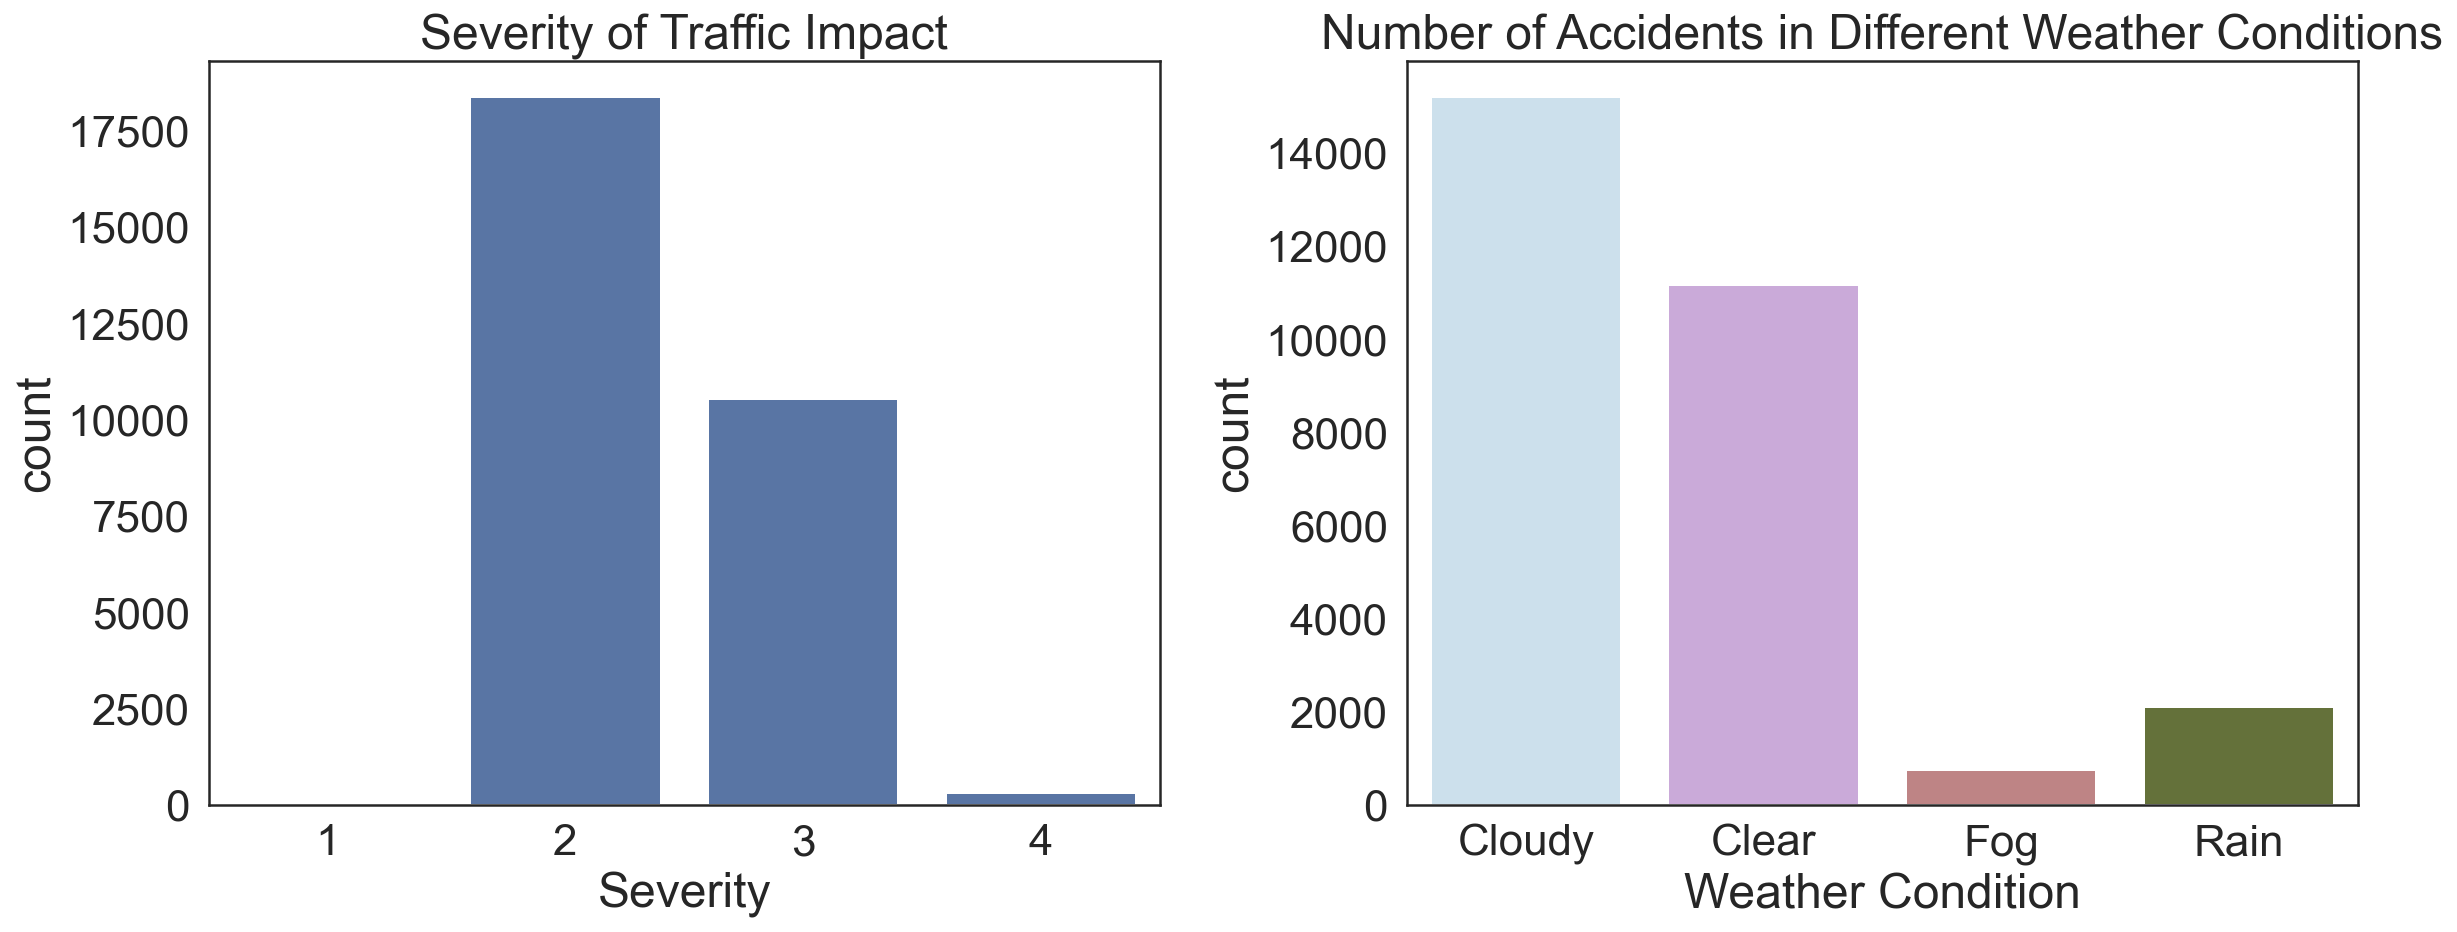

In [21]:
#distribution of traffic severity
plt.subplot(1, 2, 1) 
severity = sns.countplot(data = df, x = 'Severity', color = 'b')
severity.set_title('Severity of Traffic Impact')

#distribution of weather conditions
plt.subplot(1, 2, 2) 
weather = sns.countplot(data = df, x = 'Weather_Condition', palette = sns.color_palette("cubehelix_r"))
weather.set_title('Number of Accidents in Different Weather Conditions')
weather.set_xlabel('Weather Condition')

plt.tight_layout()

#### Interpretation/Explanation of Graphs
In the bar graph on the left, titled "Severity of Traffic Impact", the median traffic severity level caused by a car accident is level 2, and level 3 had a little over half the number of car accidents that level 2 had. The purpose of this visualization is to show the frequency of car accidents that resulted in different traffic severity levels. The data on this graph is also positively skewed as there are very little to no accidents that occurred which resulted in traffic severity level 1. 

In the bar graph on the right, titled "Number of Accidents in Different Weather Conditions", we can see that there is a higher number of accidents that occurred in cloudy weather and clear weather compared to fog and rain. This is may be due to the fact that weather in San Diego weather is usually clear or cloudy, so there are fewer accidents happening in the fog and rain.

#### 2.1b - Explore relationship between severity of traffic impact and different weather conditions (Rain, Cloudy, Clear, Fog)

Now we have a better understanding of the individual count distributions of traffic severity and weather conditions, we can visualize the relationship between traffic severity level and weather condition with car accident frequency.  

Text(0, 0.5, 'Number of Accidents')

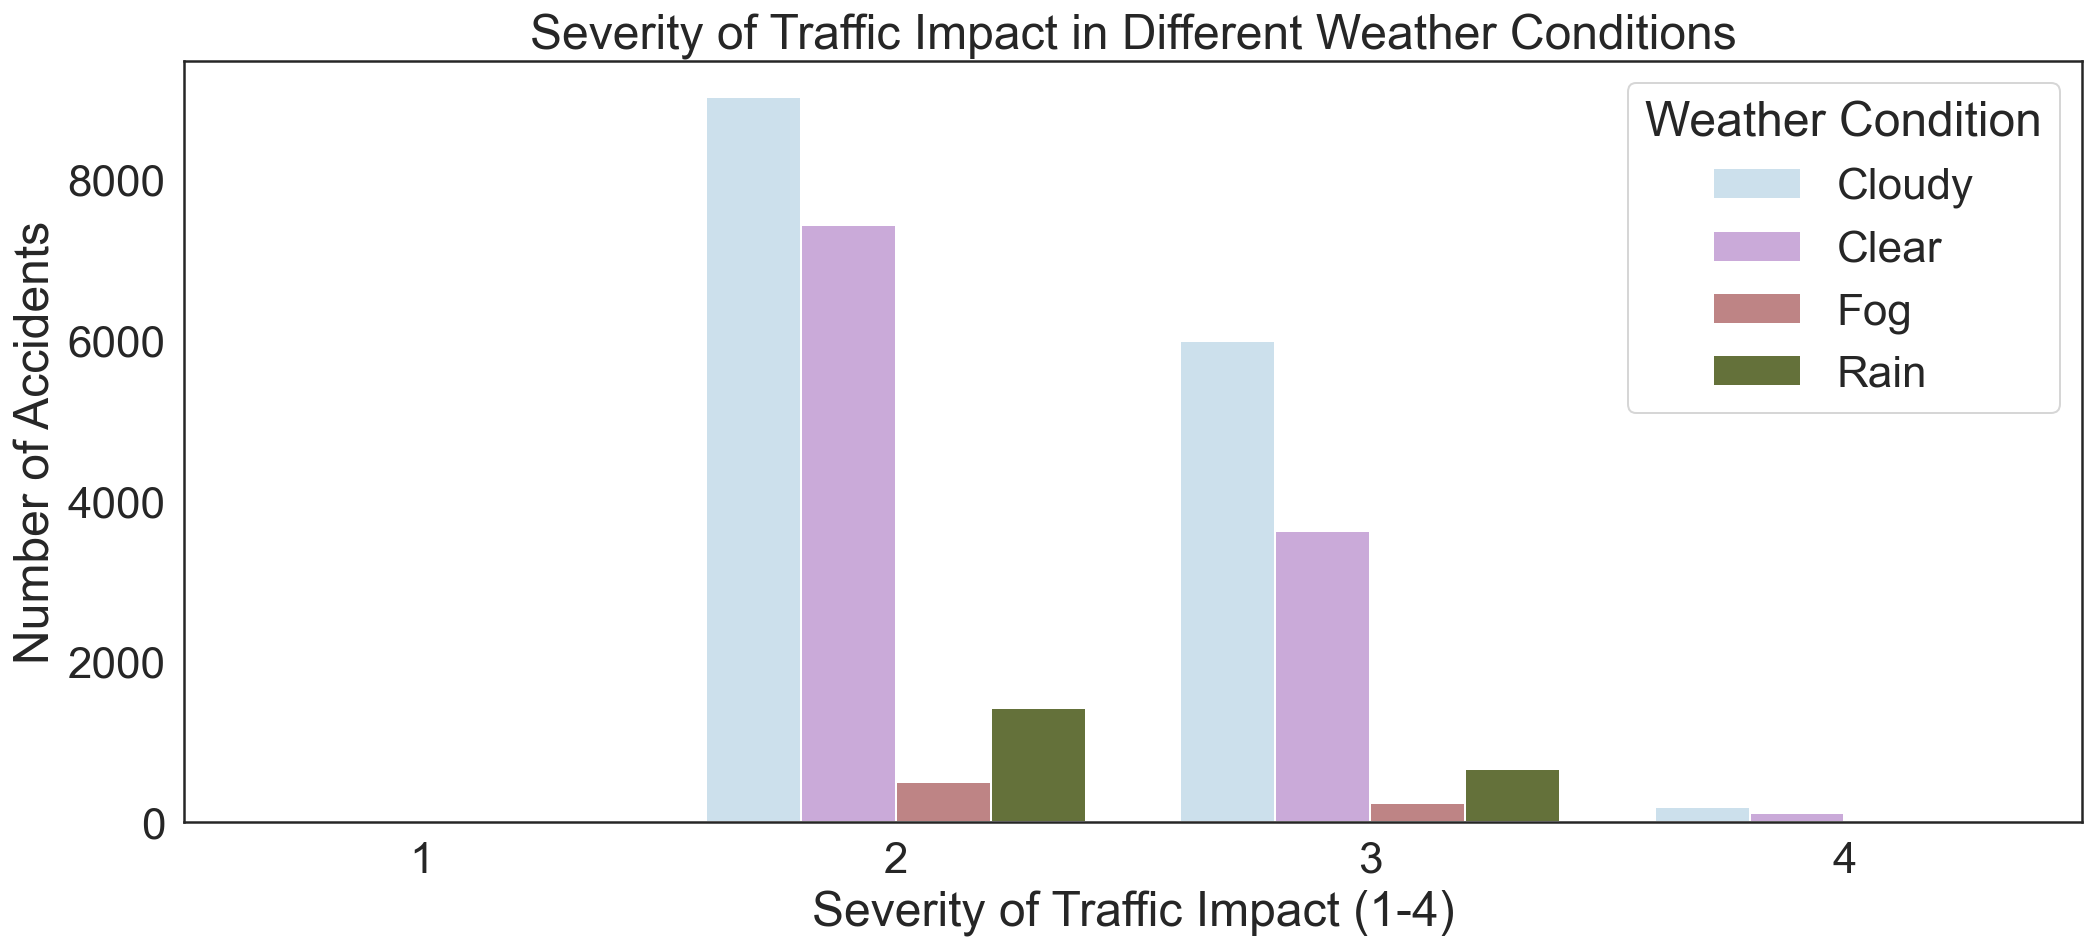

In [22]:
#show the severity of traffic impact in different weather conditions
severity_weather_condition = sns.countplot(data = df, x = 'Severity', hue = 'Weather_Condition', palette = sns.color_palette("cubehelix_r"))

#setting axis and legend titles
plt.legend(title='Weather Condition')
severity_weather_condition.set_title('Severity of Traffic Impact in Different Weather Conditions')
severity_weather_condition.set_xlabel('Severity of Traffic Impact (1-4)')
severity_weather_condition.set_ylabel('Number of Accidents')

#### Explanation/Interpretation of graph
Looking at our data visualizations, we can clearly see that there are many more accidents that caused a level 2 traffic severity than any other severity level. Regardless of traffic severity level, accidents occur the most frequently in cloudy weather conditions, with clear weather as the next most common condition. We believe that since it does not rain frequently in San Diego, there is not much data that shows the severity of traffic impact in rainy conditions. Most of the time, there are clear or cloudy skies, so we expect there to be more accidents in these two weather conditions. 

#### 2.1c - Hypothesis Test

- __Null Hypothesis__: Traffic severity is not associated with weather conditions.
- __Alternative Hypothesis__: Traffic severity is associated with weather conditions.
- Alpha/Significance Level: 0.05
- Test Statistic: χ2 (Chi-Square Test)

We chose to use a Chi-Squared Test to determine if there is a relationship between the categorical variables and traffic severity. Different weather conditions have different levels of traffic impact, so we want to understand if there is an association between those two variables. Since our dataset contains categorical data, we can use a Chi-Squared Test to determine if there is a relationship between weather condition and traffic impact.

As the chi-square test compares two different categorical variables at a time, each comparison has its own null and alternative hypotheses for comparing each weather condition's severity distribution. All null hypotheses are in the form of: "The distribution of traffic severity is the same for X and Y", with each weather condition as the X or Y variable.
- eg one null hypothesis would be: "The distribution of traffic severity is the same for cloudy and clear weather"

In [23]:
#chi-squared test 

#find count values for all categorical variables
weather_count_values = df.groupby(['Severity','Weather_Condition']).size().reset_index(name='count')
weather_count_values

,Severity,Weather_Condition,count
0,1,Clear,2
1,1,Cloudy,7
2,1,Fog,1
3,2,Clear,7426
4,2,Cloudy,9021
5,2,Fog,498
6,2,Rain,1426
7,3,Clear,3624
8,3,Cloudy,5993
9,3,Fog,237


In [24]:
#show table of observed values in dataset
observed_table= pd.crosstab(df['Weather_Condition'], df['Severity']) 
observed_table = pd.DataFrame(observed_table,index=['Clear','Cloudy','Fog','Rain','Total'])
observed_table['Total'] = observed_table.sum(axis=1)
observed_table.iloc[-1] = observed_table.iloc[-1] = observed_table.sum(axis=0)
observed_table

Severity,1,2,3,4,Total
Clear,2.0,7426.0,3624.0,110.0,11162.0
Cloudy,7.0,9021.0,5993.0,182.0,15203.0
Fog,1.0,498.0,237.0,4.0,740.0
Rain,0.0,1426.0,664.0,13.0,2103.0
Total,10.0,18371.0,10518.0,309.0,29208.0


In [25]:
#calculate chi-square statistic, p value, and degrees of freedom

chi2, p, dof, expected = chi2_contingency(observed=observed_table)
expected_table = pd.DataFrame(expected,\
                                           index=['Clear','Cloudy','Fog','Rain','Total'],\
                                           columns=['1','2','3','4','Total'])
#print out table of expected values
expected_table

,1,2,3,4,Total
Clear,3.821556,7020.580047,4019.512325,118.086072,11162.0
Cloudy,5.205081,9562.253937,5474.703985,160.836997,15203.0
Fog,0.253355,465.438921,266.479047,7.828677,740.0
Rain,0.720008,1322.727095,757.304643,22.248254,2103.0
Total,10.000000,18371.000000,10518.000000,309.000000,29208.0


In [26]:
#chi-square statistic and p value 

print('chi-square statistic =', chi2)
print('p value =', p)

chi-square statistic = 180.59447211752473
p value = 6.402007809425852e-30


#### Conclusion of Hypothesis Test:
Since our p-value of 9.21e-30 is less than our alpha value of 0.05, we can reject the null hypothesis that traffic severity is not influenced by weather condition. This means our data pertaining to weather conditions and its relationship to traffic severity is statistically significant, which means that it is very unlikely that the result of our data is due to chance.  This shows that the effects are not driven just by the number of accidents alone, but the traffic severity is affected by the weather. 

### 2.2 - Severity of Traffic Impact: Road location

Now we want to see whether road location significantly impacts traffic severity levels following an accident. We first visualized the accident count distributions based on the interaction between each road location and traffic severity level. Then we performed a Chi-Square hypothesis test to determine whether any differences are meaningful and not driven by the number of accidents alone

#### 2.2a -  Explore relationship between severity of traffic and different road locations (Junction, Stop Sign, Traffic Signal)

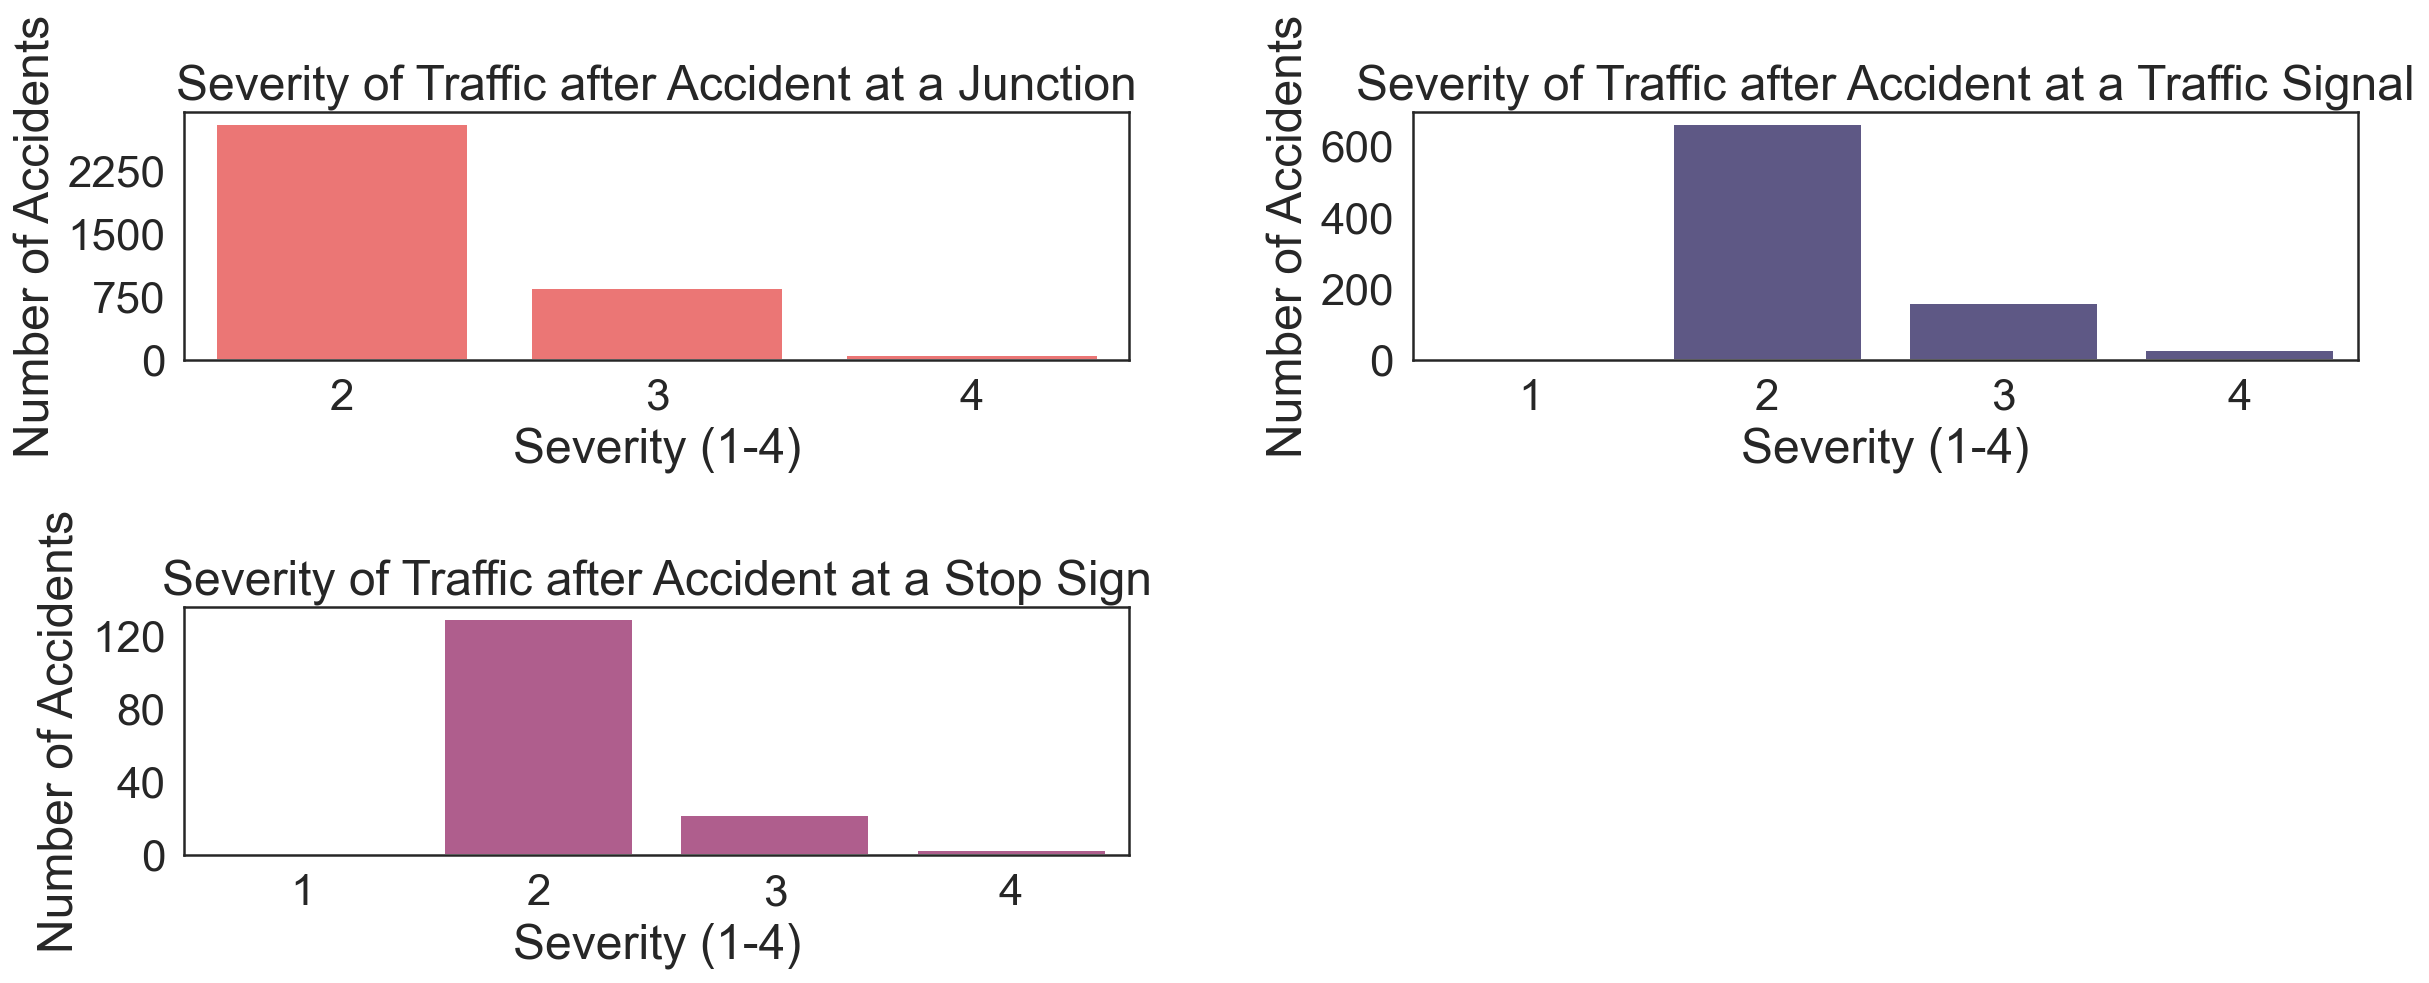

In [27]:
#severity of traffic impact due to different road locations - countplots

#severity of traffic at junction
plt.subplot(2, 2, 1)  
junction = sns.countplot(df[df['Junction'] == True ]['Severity'], color = '#ff6361')

#set axis titles
junction.set_title('Severity of Traffic after Accident at a Junction')
junction.set_xlabel('Severity (1-4)')
junction.set_ylabel('Number of Accidents')
start, end = junction.get_ylim()
junction.yaxis.set_ticks(np.arange(start, end, 750))

#severity of traffic at traffic signal
plt.subplot(2, 2, 2)
traffic_signal = sns.countplot(df[df['Traffic_Signal'] == True ]['Severity'], color = '#58508d')

#set axis titles
traffic_signal.set_title('Severity of Traffic after Accident at a Traffic Signal')
traffic_signal.set_xlabel('Severity (1-4)')
traffic_signal.set_ylabel('Number of Accidents')
start, end = traffic_signal.get_ylim()
traffic_signal.yaxis.set_ticks(np.arange(start, end, 200))

#severity of traffic at stop sign
plt.subplot(2, 2, 3)  
stop = sns.countplot(df[df['Stop'] == True ]['Severity'], color = '#bc5090')

#set axis titles
stop.set_title('Severity of Traffic after Accident at a Stop Sign')
stop.set_xlabel('Severity (1-4)')
stop.set_ylabel('Number of Accidents')
start, end = stop.get_ylim()
stop.yaxis.set_ticks(np.arange(start, end, 40))

plt.tight_layout()
plt.subplots_adjust(hspace = 1, wspace = 0.3)


#### Interpretation/Explanation of Graphs

Since we are focusing only on accidents that occurred at these three road locations - Junction, Traffic Signal, and Stop Sign - there are only 4712 observations accounted for in these graphs, as 24496 accidents occurred somewhere else. 

The most frequent severity of traffic (2) and highest number of accidents occurred at junctions; the second most frequent location where an accident occurred was at traffic signals, and the third most frequent was at stop signs. There is a significantly higher number of accidents that happen at junctions and much fewer accidents that happen at stop signs. The lack of accidents that occur at a stop sign could be because cars are less likely to be in motion, which reduces the chance of a collision. This would also explain why the ratio of accidents of level 2 traffic severity to overall accidents at stop signs is much higher compared to accidents at traffic signals and junctions. 

#### 2.2b - Hypothesis Test

- __Null Hypothesis__: Traffic severity is not associated with road locations. 
- __Alternative Hypothesis__: Traffic severity is associated with road locations.
- Alpha/Significance Level: 0.05
- Test Statistic: χ2 (Chi-Square Test)

Different road locations have different levels of traffic impact, so we want to understand if there is an association between those two variables. Since our dataset contains categorical data, we can use a Chi-Squared Test to determine if there is a relationship between road location and traffic impact.

Each comparison of road location and its severity distribution in the chi-square test has its own null and alternative hypotheses. All null hypotheses are in the form of: "The distribution of traffic severity is the same for X and Y", with each road location as the X or Y variable.
- eg one null hypothesis would be: "The distribution of traffic severity is the same for junctions and stop signs"

In [28]:
#chi-squared test 

#find count values for all categorical variables
junc_sever = df[df['Junction']==True]['Severity'].value_counts()
sign_sever = df[df['Traffic_Signal']==True]['Severity'].value_counts()
stop_sever = df[df['Stop']==True]['Severity'].value_counts()
print(junc_sever)
print(sign_sever)
print(stop_sever)

2    2810
3     857
4      58
Name: Severity, dtype: int64
2    663
3    158
4     27
1      1
Name: Severity, dtype: int64
2    129
3     22
4      3
1      1
Name: Severity, dtype: int64


In [29]:
#Observed table based on categorical variables between severity and road location

observed_table2 = pd.DataFrame(np.array([[0,junc_sever[2],junc_sever[3],junc_sever[4]],\
                                          [sign_sever[1],sign_sever[2],sign_sever[3],sign_sever[4]],\
                                          [stop_sever[1],stop_sever[2],stop_sever[3],stop_sever[4]]]),\
                                       index=['Junction','Traffic Signal','Stop'],\
                                       columns=['1','2','3','4'])
observed_table2['Total'] = observed_table2.sum(axis=1)
observed_table2 = pd.DataFrame(observed_table2,index=['Junction','Traffic Signal','Stop','Total'])
observed_table2.iloc[-1] = observed_table2.iloc[-1] = observed_table2.sum(axis=0)
observed_table2

,1,2,3,4,Total
Junction,0.0,2810.0,857.0,58.0,3725.0
Traffic Signal,1.0,663.0,158.0,27.0,849.0
Stop,1.0,129.0,22.0,3.0,155.0
Total,2.0,3602.0,1037.0,88.0,4729.0


In [30]:
chi2, p, dof, expected = chi2_contingency(observed=observed_table2)
expected_table = pd.DataFrame(expected,\
                                           index=['Junction','Traffic Signal','Stop','Total'],\
                                           columns=['1','2','3','4','Total'])
expected_table

,1,2,3,4,Total
Junction,1.575386,2837.270036,816.837598,69.316980,3725.0
Traffic Signal,0.359061,646.669063,186.173187,15.798689,849.0
Stop,0.065553,118.060901,33.989215,2.884331,155.0
Total,2.000000,3602.000000,1037.000000,88.000000,4729.0


In [31]:
#chi square and p value 

print('chi-square statistic =', chi2)
print('p value =', p)

chi-square statistic = 37.989160115390135
p value = 0.00015418854459044455


#### Conclusions of Hypothesis Test:
Since our p-value is less than our alpha value of 0.05, we can reject the null hypothesis that traffic severity is not influenced by road location of the car crash. This means our data pertaining to the road location of accidents and its relationship to traffic severity is statistically significant, which means that it is very unlikely that the result of our data is due to chance. This shows that the effects are not driven just by the number of accidents, but the traffic severity is affected by the road location at which the accident occurred. 

### 2.3 - Severity of Traffic: Interaction

We can now explore whether the interaction between our variables of interest - road location and weather condition - significantly influence the number of car accidents that occur during specific weather conditions and at different road locations, as well as severity of the traffic jams that follow. 

We decided to visualize our data with heatmaps to make the results of each weather condition and road location interaction more understandable and clear. 

#### 2.3a - Explore how the interaction between different weather conditions and road location impacts number of car accidents

In [32]:
#table that gives the mean severity per interaction between each weather condition and road location

stop = df[df['Stop']== True]['Weather_Condition'].value_counts()
junction = df[df['Junction']== True]['Weather_Condition'].value_counts()
signal = df[df['Traffic_Signal']== True]['Weather_Condition'].value_counts()

heat_map_accident = pd.DataFrame(np.array([junction, signal,stop]),\
                                       index=['Junction','Traffic Signal','Stop'],\
                                       columns=['Cloudy','Clear','Rain','Fog'])
heat_map_accident = heat_map_accident[['Cloudy', 'Clear', 'Fog', 'Rain']]

Text(74.40625, 0.5, 'Road Location')

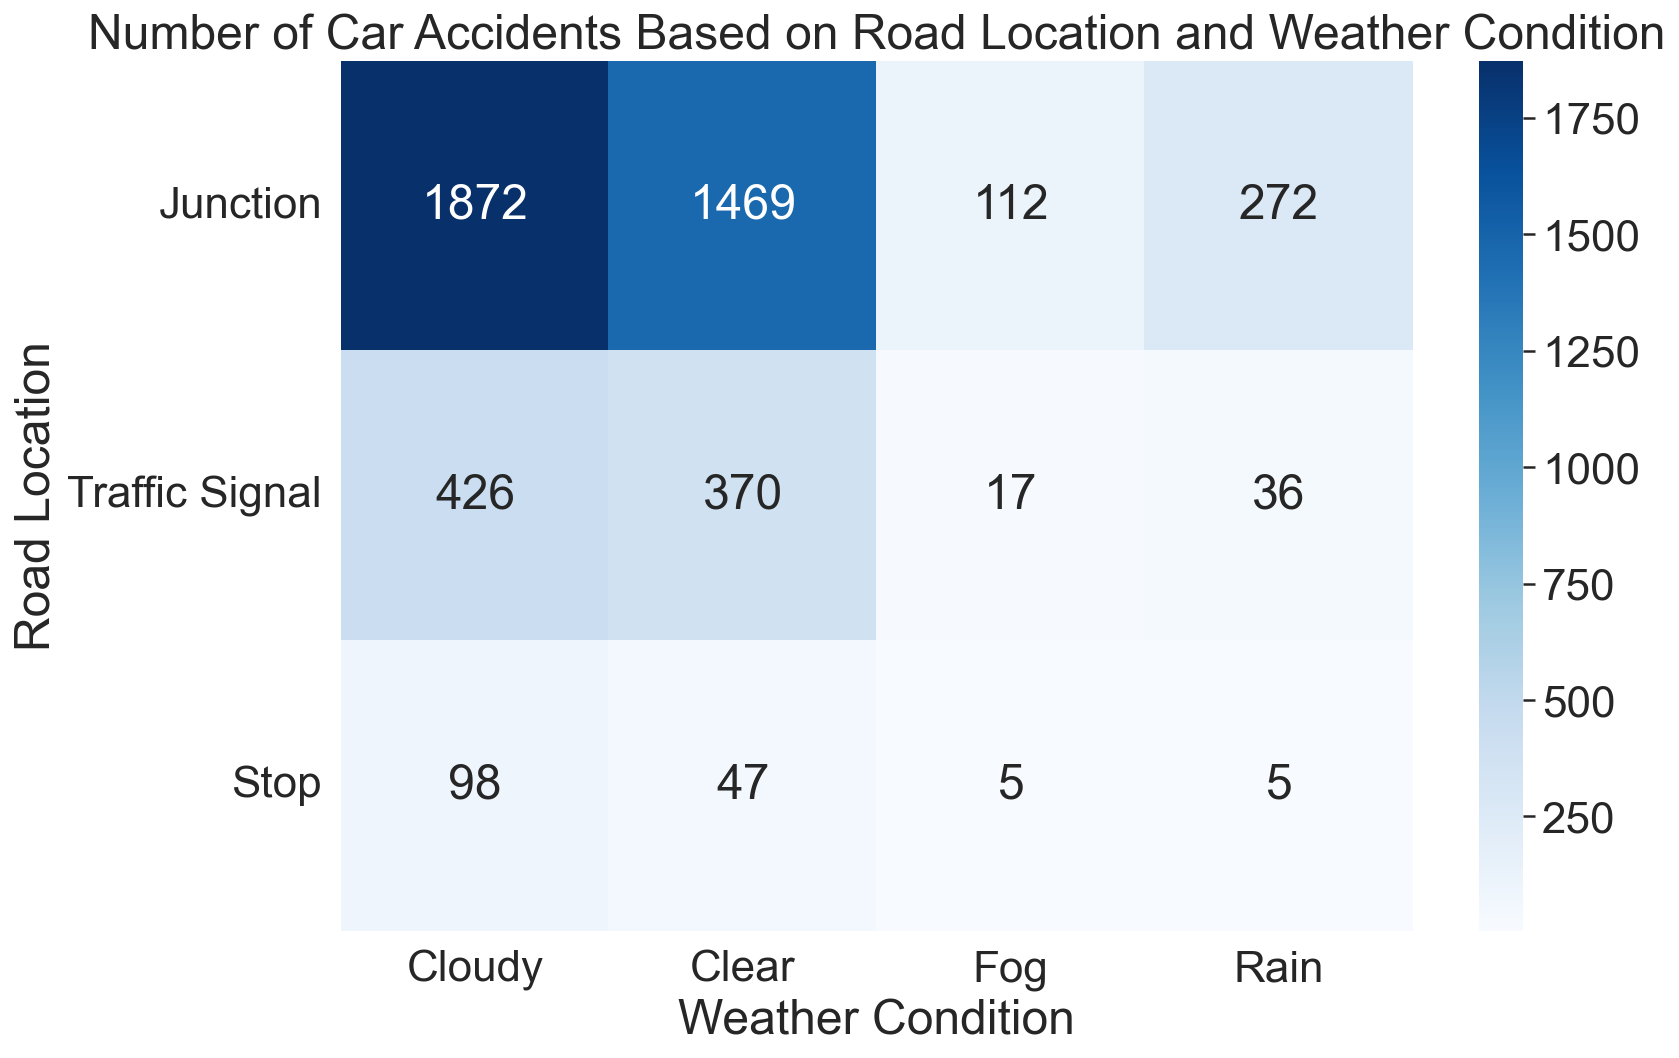

In [33]:
#heatmap of number of car accidents based on weather condition and road location

plt.figure(figsize=(12,8)) 
sns.heatmap(heat_map_accident, annot=True, fmt='g', cmap="Blues")

#set labels and ticks
pos, textvals = plt.yticks()
plt.yticks(pos,('Junction','Traffic Signal','Stop'), 
    rotation=0, va="center")

plt.title('Number of Car Accidents Based on Road Location and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Road Location')

#### Interpretation of Heatmap

The heatmap represents the number of car accidents at a given weather condition and road location, with the frequency of accidents increasing as the shade of blue deepens and darkens.  

It seems that the highest number of accidents (1872 accidents) occurred at a junction in cloudy weather and the fewest number of accidents occurred at a stop sign in rainy or foggy weather. 


#### 2.3b - Hypothesis Test - Number of Accidents

- __Null Hypothesis__: Weather condition does not influence the number of car accidents at different road locations.
- __Alternative Hypothesis__: Weather condition influences the number of car accidents at different road locations.
- Alpha/Significance Level: 0.05
- Test Statistic: χ2 (Chi-Square Test)

Both weather condition and road location have different impacts on the number of car accidents, so we want to understand if the interaction between both variables influences car crash frequency. Since our dataset contains categorical data, we can use a Chi-Squared Test to determine if there is a relationship between the weather condition and the car accident frequency at different road locations.

In [34]:
heat_map_accident['Total'] = heat_map_accident.sum(axis=1)
observed_table3 = pd.DataFrame(heat_map_accident,index=['Junction','Traffic Signal','Stop','Total'])
observed_table3.iloc[-1] = observed_table3.iloc[-1] = observed_table3.sum(axis=0)
observed_table3

,Cloudy,Clear,Fog,Rain,Total
Junction,1872.0,1469.0,112.0,272.0,3725.0
Traffic Signal,426.0,370.0,17.0,36.0,849.0
Stop,98.0,47.0,5.0,5.0,155.0
Total,2396.0,1886.0,134.0,313.0,4729.0


In [35]:
#chi-squared test:
chi2, p, dof, expected = chi2_contingency(observed=observed_table3)
expected_table = pd.DataFrame(expected,\
                                           index=['Junction','Traffic Signal','Stop','Total'],\
                                           columns=['Cloudy','Clear','Fog','Rain','Total'])
expected_table

,Cloudy,Clear,Fog,Rain,Total
Junction,1887.312328,1485.588919,105.550856,246.547896,3725.0
Traffic Signal,430.155213,338.594629,24.057095,56.193064,849.0
Stop,78.532459,61.816452,4.392049,10.259040,155.0
Total,2396.000000,1886.000000,134.000000,313.000000,4729.0


In [36]:
print('chi-square statistic =', chi2)
print('p value =', p)

chi-square statistic = 26.76786593754567
p value = 0.008344016676593239


Since our p-value is less than our alpha value of 0.05, we can reject the null hypothesis that number of car accidents based on road location is not influenced by weather condition. Our data pertaining to the number of car accidents based on road location and its relationship to weather condition is statistically significant, which means that it is very unlikely that the result of our data is due to chance. 

Now, seeing that our results are statistically significant, we decided to do a post-hoc analysis on our chi-square data to see which pairs of road locations were significantly different from one other in regards to weather impact on car accident frequency. 

In [37]:
def chisq_and_posthoc_corrected(df):
    

    all_combinations = list(itertools.combinations(df.index, 2))
    p_vals = []
    for comb in all_combinations:
        # subset df into a dataframe containing only the pair "comb"
        new_df = df[(df.index == comb[0]) | (df.index == comb[1])]
        # running chi2 test
        chi2, p, dof, ex = chi2_contingency(new_df, correction=True)
        p_vals.append(p)

    #avoid multiple comparison bias
    reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]
    print("original p-value\tcorrected p-value\treject?")
    for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
        print(p_val, "\t", corr_p_val, "\t", reject, "\t", comb)

In [38]:
chisq_and_posthoc_corrected(heat_map_accident)

original p-value	corrected p-value	reject?
0.004592534027506859 	 0.013777602082520579 	 True 	 ('Junction', 'Traffic Signal')
0.020753150073722654 	 0.026017741644903152 	 True 	 ('Junction', 'Stop')
0.026017741644903152 	 0.026017741644903152 	 True 	 ('Traffic Signal', 'Stop')


#### Conclusion of Hypothesis Test and Analysis

Looking at our chi-square test and post-hoc analysis results, the p-values for each pair of road locations are less than the alpha value of 0.05, so the number of car accidents at every road location was impacted by weather condition in a statistically significant way. There was a statistically significant difference in the number of car accidents in different weather conditions at Junctions, Stops, and Traffic Signals. Therefore, we can reject each null hypothesis that weather condition does not influence the number of car accidents between any two road locations, and our results are most likely not due to chance alone. 

#### 2.3c - Explore how the interaction between different weather conditions and road location impacts traffic severity

In [39]:
#table that gives the mean severity per interaction between each weather condition and road location

mean_stop = df['Severity'].groupby(df['Weather_Condition'][df['Stop'] == True]).mean()
mean_signal = df['Severity'].groupby(df['Weather_Condition'][df['Traffic_Signal'] == True]).mean()
mean_junction = df['Severity'].groupby(df['Weather_Condition'][df['Junction'] == True]).mean()
heat_map_severity = pd.DataFrame(np.array([mean_junction, mean_signal,mean_stop]),\
                                       index=['Junction','Traffic Signal','Stop'],\
                                       columns=['Clear','Cloudy','Fog','Rain'])
heat_map_severity = heat_map_severity[['Cloudy', 'Clear', 'Fog', 'Rain']]

Text(74.40625, 0.5, 'Road Location')

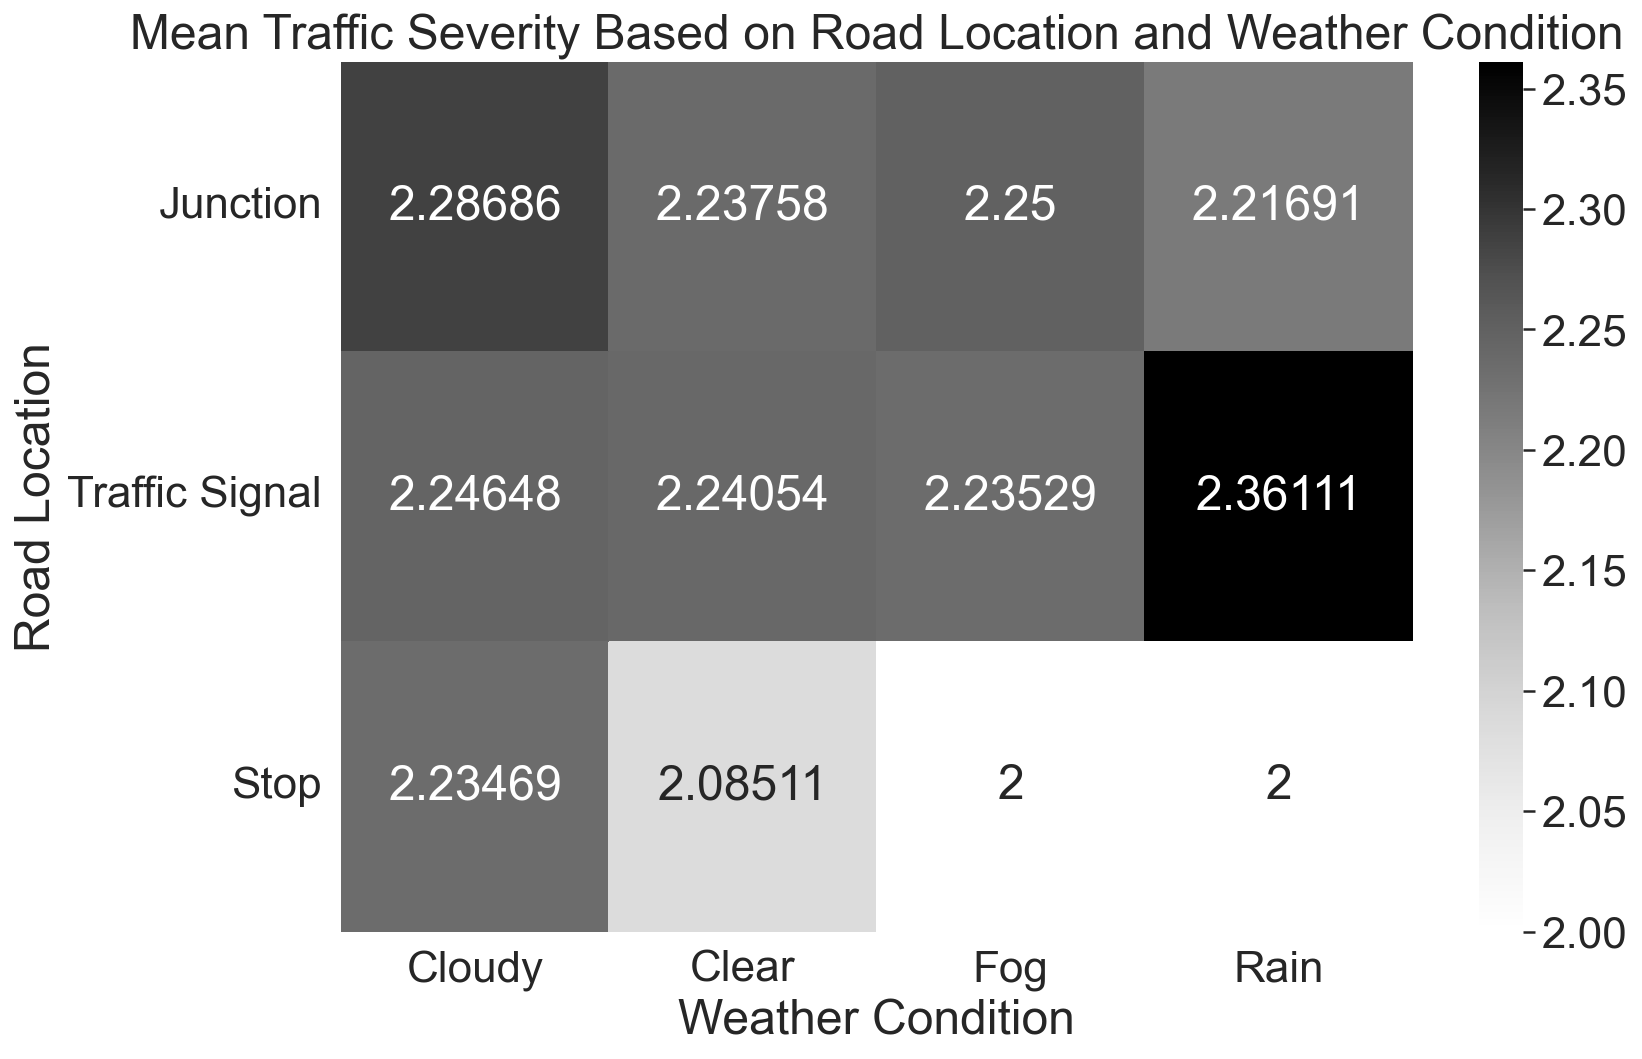

In [40]:
#heatmap of mean severity based on weather condition and road location

plt.figure(figsize=(12,8)) 
sns.heatmap(heat_map_severity, annot=True, fmt='g', cmap="Greys")

#set labels and ticks
pos, textvals = plt.yticks()
plt.yticks(pos,('Junction','Traffic Signal','Stop'), 
    rotation=0, va="center")

plt.title('Mean Traffic Severity Based on Road Location and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Road Location')


#### Interpretation of Heat Map

The heatmap represents the mean traffic severity due to a car crash given the interaction between different weather conditions and road locations, with the severity level increasing with the grey gradient from light to dark.

The mean traffic severity based on the interactions between different weather condition and road location are all around 2. This aligns with the results of the individual variable distributions of traffic severity, with each weather condition and road location having more crashes with a traffic severity of around 2. 

It seems that the interaction between Rain and a Traffic signal had the highest impact on traffic, with a mean severity of 2.36, which could be due to drivers running red lights and underestimating the time they need to brake due to more slippery road conditions from the rain.

#### 2.3d - Hypothesis Test - Mean Severity

- __Null Hypothesis__: The distributions of the traffic severity between road location and weather condition are the same.
- __Alternative Hypothesis__: The distributions of the traffic severity between road location and weather condition are different.
- Alpha/Significance Level: 0.05
- Test Statistic: U (Mann-Whitney U Test)

As previously shown, both weather condition and road location independently impact traffic severity following an accident. We are interested in understanding if the interaction between both variables influence the mean traffic severity. We decided to use the Mann-Whitney U Test to determine if the two distributions are significantly different and if there is a relationship between the weather condition and the traffic severity at different road locations following an accident.

In [41]:
#Mann-Whitney U Test

cloudy_severity = list(df[df['Weather_Condition'] == 'Cloudy']['Severity'])
fog_severity = list(df[df['Weather_Condition'] == 'Fog']['Severity'])
clear_severity = list(df[df['Weather_Condition'] == 'Clear']['Severity'])
rain_severity = list(df[df['Weather_Condition'] == 'Rain']['Severity'])

junction_severity = list(df[df['Junction'] == True]['Severity'])
stop_severity = list(df[df['Stop'] == True]['Severity'])
signal_severity = list(df[df['Traffic_Signal'] == True]['Severity'])

In [42]:
#Test the distributions of the traffic severity between all weather conditions with road location.
print('Cloudy, Junction:', mannwhitneyu(cloudy_severity, junction_severity))
print('Cloudy, Stop:', mannwhitneyu(cloudy_severity, stop_severity))
print('Cloudy, Traffic Signal:', mannwhitneyu(cloudy_severity, signal_severity))
print('Fog, Junction:', mannwhitneyu(fog_severity, junction_severity))
print('Fog, Stop:', mannwhitneyu(fog_severity, stop_severity))
print('Fog, Traffic Signal:', mannwhitneyu(fog_severity, signal_severity))
print('Clear, Junction:', mannwhitneyu(clear_severity, junction_severity))
print('Clear, Stop:', mannwhitneyu(clear_severity, stop_severity))
print('Clear, Traffic Signal:', mannwhitneyu(clear_severity, signal_severity))
print('Rain, Junction:', mannwhitneyu(rain_severity, junction_severity))
print('Rain, Stop:', mannwhitneyu(rain_severity, stop_severity))
print('Rain, Traffic Signal:', mannwhitneyu(rain_severity, signal_severity))

Cloudy, Junction: MannwhitneyuResult(statistic=23875667.5, pvalue=5.121535271648839e-70)
Cloudy, Stop: MannwhitneyuResult(statistic=892636.0, pvalue=5.540383198200618e-10)
Cloudy, Traffic Signal: MannwhitneyuResult(statistic=5303001.0, pvalue=3.8962137767331987e-25)
Fog, Junction: MannwhitneyuResult(statistic=1274501.5, pvalue=1.0301096745927118e-05)
Fog, Stop: MannwhitneyuResult(statistic=48049.5, pvalue=3.199500196241e-05)
Fog, Traffic Signal: MannwhitneyuResult(statistic=283241.5, pvalue=5.656121680667661e-06)
Clear, Junction: MannwhitneyuResult(statistic=19002036.0, pvalue=7.022317754776266e-23)
Clear, Stop: MannwhitneyuResult(statistic=715837.0, pvalue=3.1498077451258195e-06)
Clear, Traffic Signal: MannwhitneyuResult(statistic=4222855.0, pvalue=4.081369377556599e-11)
Rain, Junction: MannwhitneyuResult(statistic=3631733.0, pvalue=1.1467845472894593e-09)
Rain, Stop: MannwhitneyuResult(statistic=136942.5, pvalue=1.7524936298663608e-05)
Rain, Traffic Signal: MannwhitneyuResult(statist

#### Conclusion of Hypothesis Test

Looking at the results of our Mann-Whitney U Test, since each p-value < 0.05, we can reject the null hypothesis, which means the difference in distributions of the traffic severity between road location and weather condition are statistically significant and most likely due to something other than chance.

These results also tell us that even though the heat map shows the mean severity for each pair of samples is about 2.2, the mean severity distributions for weather condition and road location are not equal. Therefore, different weather conditions have a statistically significant impact on the mean traffic severity at different road locations.

# Ethics & Privacy

**Do you have permission to use this data?**

The dataset we plan on using is distributed for non-commercial, research, or academic applications under Creative Commons Attribution-Noncommercial-ShareAlike license (CC BY-NC-SA 4.0). This dataset was free to download as long as it is used non-commercially for research or academic purposes. 

**Are there privacy concerns regarding your datasets that you need to deal with, and/or terms of use that you need to comply with?**

All of the data retrieved from this dataset has already been anonymized. Details from the recorded accidents regarding the persons involved are not recorded in the data. The data in this dataset are collected using 2 traffic APIs that broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks.

**Are there potential biases in your dataset(s), in terms of who composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis?**

Some potential biases may include how the APIs collect the information. Because the data is based on the severity of traffic due to accidents, small car accidents that don't cause traffic may go unreported in the data as police involvement is not required. Also, because the incidents recorded in the dataset are based on traffic severity, large car accidents that occur on empty roads with no other cars may go unrecorded as it does not impact traffic. 

In our data, we decided to exclude weather conditions that had fewer than 25 occurrences at a car accident. We did this because we did not consider those weather conditions to be significant as they occurred very rarely over the course of several years and thus would not representative of common San Diego weather and did not relate to our analysis as a whole. Since there was so little data for these points, we wouldn't be able to obtain any conclusive data from it. Weather conditions that had more than 25 occurrences were organized into four groups: Clear, Cloudy, Rain, Fog based on what we as a group thought was most appropriate.

**Are there any other issues related to your topic area, data, and/or analysis that are potentially problematic in terms of data privacy and equitable impact? How will you handle issues you identified?**

The dataset has a lot of third parties/contributors who can manipulate the data. Because of the number of contributors, the scale for "severity" could be different for each person and thus hard to narrow down a precise definition. How severity is dictated is not explicitly clear in the dataset. 

Any information pertaining to the identities of those involved in the accidents recorded in the dataset is not included. Although the dataset records the city of where the accident took place and when the accident had occurred, it would be very unlikely that the information recorded in the dataset could be used to locate or identify any persons involved. We also removed the coordinates of the accidents from the dataset since it was irrelevant to the question we were trying to answer.

# Conclusion & Discussion

Our research project’s goal was to give insight into what factors play into the likelihood of a car crash and the severity of the traffic jam that follows. Before our analysis, our own experiences driving in San Diego and background research led us to believe that car accidents that occurred on a junction in rainy weather would lead to a more severe traffic jam.

Our analysis is limited in that we cut out many accidents and did not include all variables - including other weather conditions, road locations, geographical location, and the time of day the accident occurred - that may have factored into the traffic severity and frequency of accidents at certain road locations. Nevertheless, our data analyses suggest that there is, in fact, a significant interaction between traffic severity, weather, and road location of an accident. The interaction between different weather conditions and road locations cause significant differences in both the frequency of car accidents and the severity of the traffic jam that follows. Furthermore, we found that car accidents that happened in rainy weather at traffic signals caused the highest level of traffic severity following the accident. This partly supports our hypothesis, in that rainy weather did lead to higher traffic severity but we originally thought junctions would also lead to higher traffic severity than other road locations.   

There was a statistically significant larger proportion of the overall frequency of car accidents that happened at junctions relative to other road conditions, with traffic signals having the second-highest number of accidents overall. Thus, it can be inferred that drivers have a higher probability of crashing at an intersection than at other road locations, which aligns with previous research [3, 4]. Traffic severity was the lowest at stop signs in foggy and rainy weather, likely due to the general lack of traffic on smaller roads and requirement for cars to come to a full stop before they continue driving, which forces drivers to be more cautious when driving in more hazardous conditions. 

Based on these results, we can infer where a car accident is more likely to occur - junctions and traffic signals - which can help drivers in California adjust their driving to be more cautious at those locations, regardless of the weather. Knowing that accidents that occur in the rain lead to higher traffic jam severity can help drivers know when to focus on the road, especially at traffic signals, and be more cautious while driving. These results may also be useful for informing city planners about where to focus efforts when planning new roads, which could also possibly help with designing better road systems that bear the impacts of a car accident more effectively.

# Team Contributions

- Cassandra Henrickson
    - Background Research
    - Data Visualization
    - Data Analysis
    - Data Cleaning
    - Conclusion
- Daniel Han
    - Background Research
    - Data Analysis
    - Graph Interpretations
    - Proofreading
- Jasmine Qiang
    - Dataset
    - Background Research
    - Graph Interpretations
    - Analysis
    - Conclusion
- Ezra Lu
    - Background Research
    - Ethics
    - Graph Interpretations
    - Data Analysis
- Calvin Leung
    - Background Research
    - Data Visualization
    - Data Cleaning
    - Data Analysis